In [1]:
import kauri as kr
import kauri.bck as bck

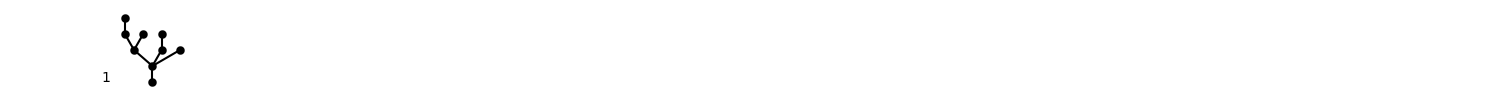

In [2]:
t = kr.Tree([[[[]], [],[[[]],[]]]])
kr.display(t.sorted(), file_name = "logo", fig_size = (15,1.1))

## Sorted representation

Since our trees are non-planar, different orderings of the same tree are treated as equal. The Tree.sorted() method gives the ordering of the tree with the heaviest branches on the right

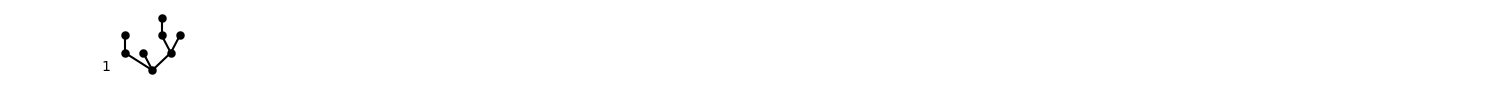

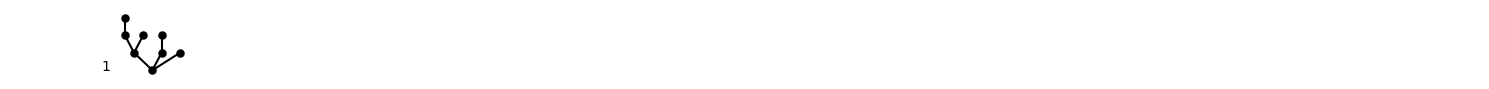

t == t.sorted():  True


In [3]:
t = kr.Tree([[[]], [],[[[]],[]]])
kr.display(t)
kr.display(t.sorted())
print("t == t.sorted(): ", t == t.sorted())

## Arithmetic

Rather than using the classes kr.Forest and kr.ForestSum directly, it is usually easier to create these objects via arithmetic operations on trees.

In [4]:
t1 = kr.Tree([[],[]])
t2 = kr.Tree([[],[],[[]]])
t3 = kr.Tree([[]])

1*[[], []] + -2*[[], [], [[]]] [[]] [[]]


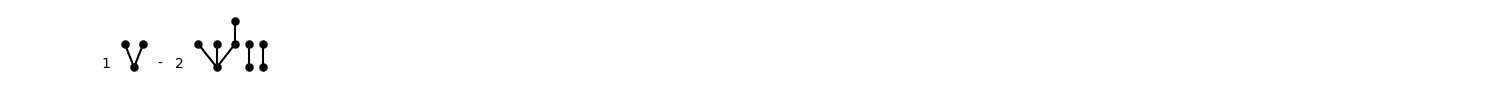

In [5]:
# Tedious to construct and read
f = kr.Forest( [t2, t3, t3] )
t4 = kr.ForestSum([ (1, t1), (-2, f) ])
print(t4)
kr.display(t4)

1*[[], []] + -2*[[], [], [[]]] [[]] [[]]


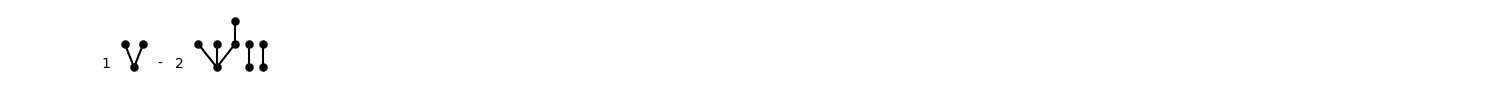

In [6]:
# Much better
t4 = t1 - 2 * t2 * t3 ** 2
print(t4)
kr.display(t4)

## Singleton-reduced representation

When the number of nodes is constant in a sum (e.g. in the antipode of a tree), it is useful to ignore redundant occurances of the single-node tree, Tree([]). When evaluating the elementary weights function of a consistent Runge--Kutta scheme, Tree([]) evaluates to 1, and so applying the elementary weights to a singleton-reduced form gives the same result.

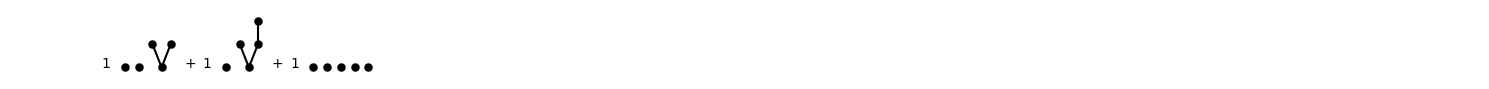

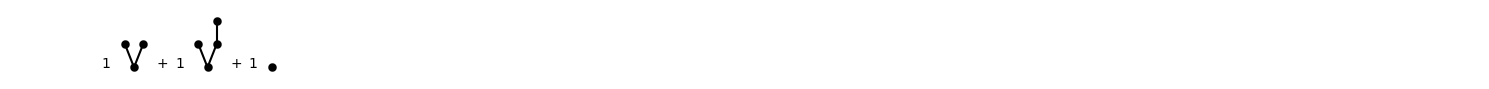

In [7]:
t1 = kr.Tree([])
t2 = kr.Tree([[],[]])
t3 = kr.Tree([[],[[]]])
f = t1 * t1 * t2 + t1 * t3 + t1 * t1 * t1 * t1 * t1
kr.display(f)
kr.display(f.singleton_reduced())

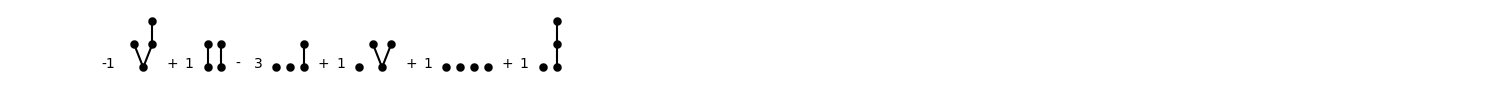

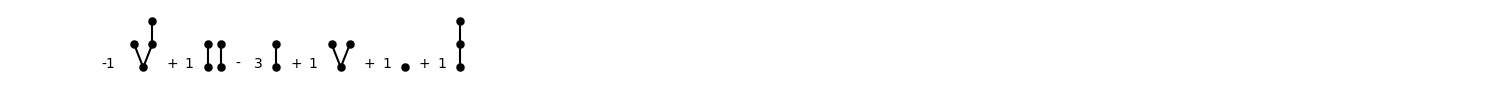

In [8]:
s = bck.antipode(kr.Tree([[],[[]]]))
kr.display(s)
kr.display(s.singleton_reduced())

In [9]:
explicit_midpoint = kr.RK([[0,0],[1/2,0]], [0,1])
s = bck.antipode(kr.Tree([[],[]]))

print(explicit_midpoint.elementary_weights(s))
print(explicit_midpoint.elementary_weights(s.singleton_reduced())) #If the RK scheme is consistent, this gives the same result

-0.25
-0.25


## Antipode

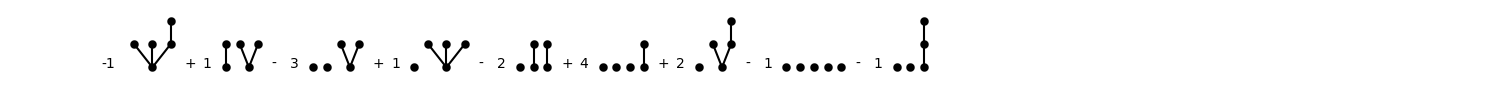

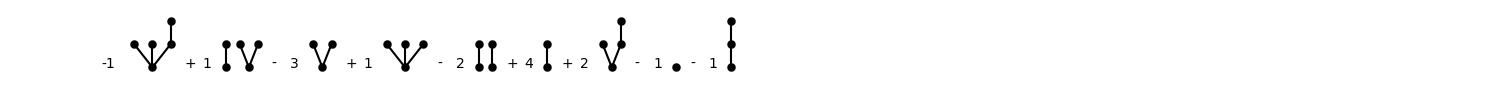

In [10]:
t1 = kr.Tree([[],[],[[]]])
t2 = bck.antipode(t1)
kr.display(t2)
kr.display(t2.singleton_reduced())

## Factorial

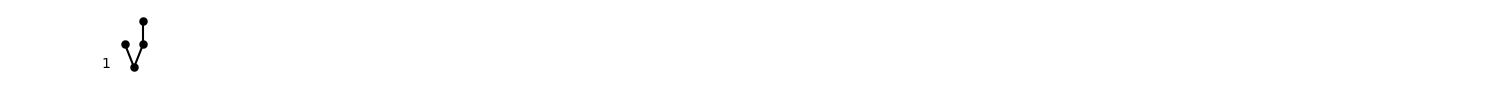

Tree Factorial:  8


In [11]:
t1 = kr.Tree([[],[[]]])
kr.display(t1)
print("Tree Factorial: ", t1.factorial())

# Iterators and Generators

## Iterating over trees

In [12]:
t = kr.Tree(None)
while t.nodes() <= 3:
    print(t)
    t = next(t)

∅
[]
[[]]
[[[]]]
[[], []]


In [13]:
for t in kr.trees_up_to_order(3):
    print(t)

∅
[]
[[]]
[[[]]]
[[], []]


In [14]:
for t in kr.trees_of_order(3):
    print(t)

[[[]]]
[[], []]


## Iterating over trees in a forest or terms in a forest sum

In [15]:
f = kr.Tree([]) ** 2 * kr.Tree([[],[]])

for t in f:
    print(t)

[]
[]
[[], []]


In [16]:
s = bck.antipode(kr.Tree([[],[]]))
print(s, "\n")

for c, f in s:
    print(c, f)

-1*[[], []] + 2*[] [[]] + -1*[] [] [] 

-1 [[], []]
2 [] [[]]
-1 [] [] []


# Testing identities of the Butcher-Connes-Kreimer Hopf algebra

In [17]:
#Maps
ident = kr.Map(lambda x : x)
counit = kr.Map(lambda x : 1 if x == kr.Tree(None) else 0)
S = bck.antipode
a = kr.Map(lambda x : 1. / x.factorial())

## Antipode Property: $\quad \mu \circ (S \otimes \mathrm{Id}) \circ \Delta = \varepsilon$

In [18]:
for t in kr.trees_up_to_order(4):
    print(counit(t), (S*ident)(t))

1 1*∅
0 0*∅
0 0*∅
0 0*∅
0 0*∅
0 0*∅
0 0*∅
0 0*∅
0 0*∅


## $S \circ S = \mathrm{Id}$

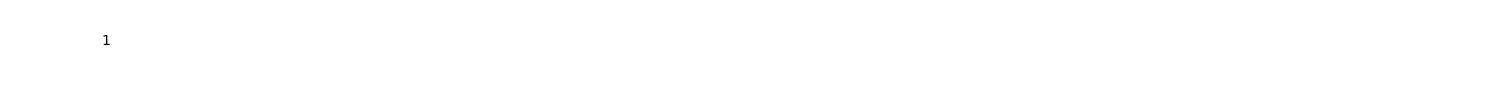

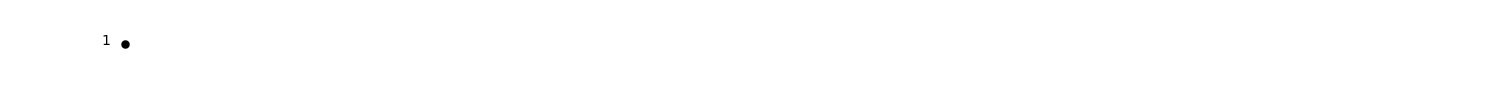

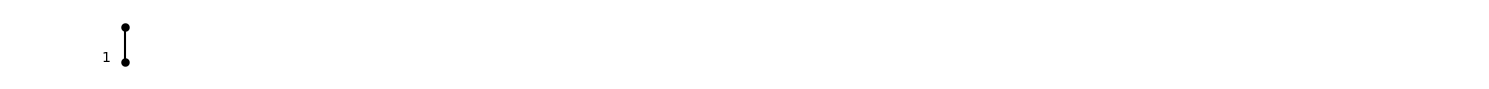

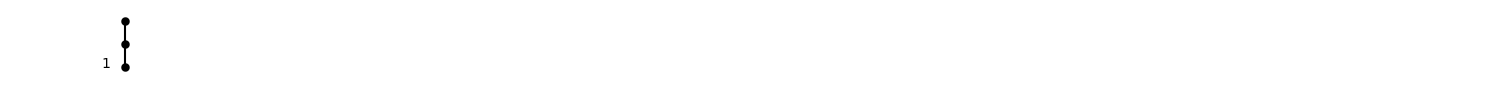

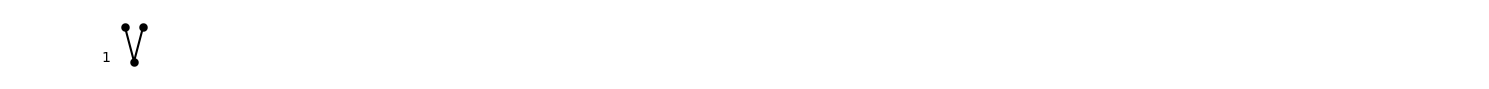

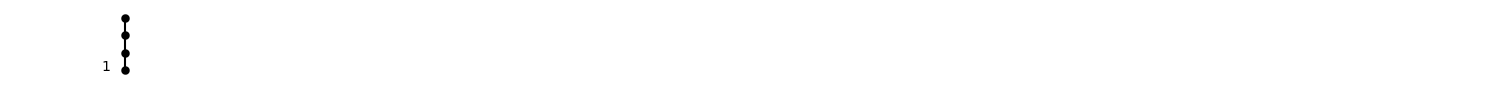

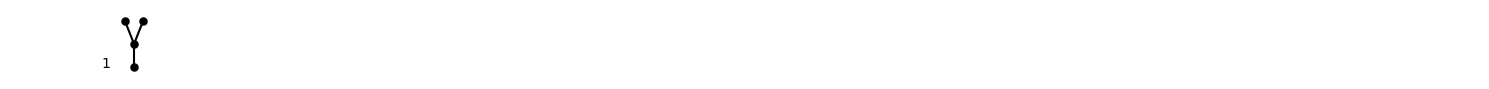

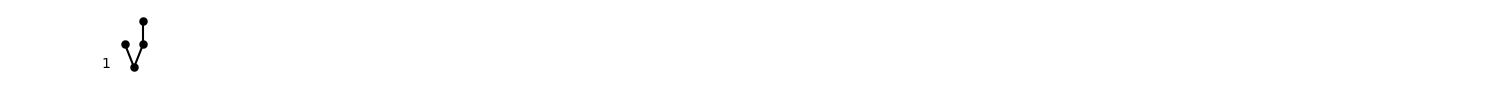

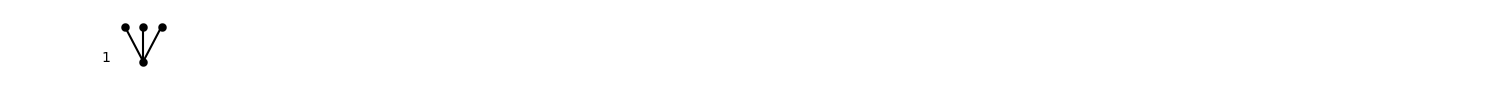

In [19]:
for t in kr.trees_up_to_order(4):
    kr.display((S @ S)(t)) # @ is composition of maps. (S @ S)(t) is equivalent to t.antipode().antipode()

## $(\mathrm{Id} - S \circ S)^{|\tau|}(\tau) = 0, \quad \forall |\tau| \geq 1$

In [20]:
g = ident - S @ S
f = kr.Map(lambda x : (g**x.nodes())(x))

for t in kr.trees_up_to_order(4):
    if t == kr.Tree(None):
        continue
    print(f(t))

0*∅
0*∅
0*∅
0*∅
0*∅
0*∅
0*∅
0*∅


## $(\mathrm{Id} + S) \circ (\mathrm{Id} - S\circ S)^{|\tau| - 1}(\tau) = 0, \quad \forall |\tau| \geq 1$

In [21]:
f1 = ident + S
f2 = ident - S @ S

f3 = kr.Map(lambda x : (f2 ** (x.nodes() - 1))(x) )

f = f1 @ f3

for t in kr.trees_up_to_order(4):
    if t == kr.Tree(None):
        continue
    print(f(t))

0*∅
0*∅
0*∅
0*∅
0*∅
0*∅
0*∅
0*∅


## $a^2(\tau) / 2^{|\tau|} = a(\tau), \quad a(\tau) = 1/\tau!$

In [22]:
for t in kr.trees_up_to_order(4):
    print(a(t), (a**2)(t) / 2**t.nodes())

1.0 1.0
1.0 1.0
0.5 0.5
0.16666666666666666 0.16666666666666666
0.3333333333333333 0.3333333333333333
0.041666666666666664 0.041666666666666664
0.08333333333333333 0.08333333333333333
0.125 0.125
0.25 0.25


## $a^{-1}(\tau) = (-1)^{|\tau|} a(\tau), \quad a(\tau) = 1/\tau!$

In [23]:
for t in kr.trees_up_to_order(4):
    print(a(t), (-1)**t.nodes() * (a**(-1))(t))

1.0 1.0
1.0 1.0
0.5 0.5
0.16666666666666666 0.16666666666666663
0.3333333333333333 0.33333333333333326
0.041666666666666664 0.04166666666666652
0.08333333333333333 0.08333333333333331
0.125 0.12499999999999992
0.25 0.25
